<div style="text-align: right"><sub>This notebook is distributed under the <a href="https://creativecommons.org/licenses/by-sa/4.0/" target="_blank">Attribution-ShareAlike 4.0 International (CC BY-SA 4.0) license</a>.</sub></div>
<h1>Hands on Machine Learning  <span style="font-size:10px;"><i>by <a href="https://webgrec.ub.edu/webpages/000004/ang/dmaluenda.ub.edu.html" target="_blank">David Maluenda</a></i></span></h1>

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a href="https://atenea.upc.edu/course/view.php?id=95161" target="_blank">
      <img src="https://github.com/dmaluenda/hands_on_machine_learning/raw/master/resources/upc_logo_49px.png" width="130"/>
    </a>
  </td>
  <td>
  </td>
  <td>   <!-- gColab -->
    <a href="https://colab.research.google.com/github/dmaluenda/hands_on_machine_learning/blob/master/01_Basics_NeuralNetworks.ipynb" target="_blank">
      <img src="https://github.com/dmaluenda/hands_on_machine_learning/raw/master/resources/colab_logo_32px.png" />
      Run in Google Colab
    </a>
  </td>
  <td>   <!-- github -->
    <a href="https://github.com/dmaluenda/hands_on_machine_learning/blob/master/01_Basics_NeuralNetworks.ipynb" target="_blank">
      <img src="https://github.com/dmaluenda/hands_on_machine_learning/raw/master/resources/github_logo_32px.png" />
      View source on GitHub
    </a>
  </td>
  <td>   <!-- download -->
    <a href="https://raw.githubusercontent.com/dmaluenda/hands_on_machine_learning/master/01_Basics_NeuralNetworks.ipynb"  target="_blank" download="01_Basics_NeuralNetworks">
      <img src="https://github.com/dmaluenda/hands_on_machine_learning/raw/master/resources/download_logo_32px.png" />
      Download notebook
      </a>
  </td>
</table>

# $\text{I}$. Neural Networks with Pure Python

Hands on "Machine Learning on Classical and Quantum data" course of
[Master in Photonics - PHOTONICS BCN](https://photonics.masters.upc.edu/en/general-information)
[[UPC](https://photonics.masters.upc.edu/en) +
[UB](https://www.ub.edu/web/ub/en/estudis/oferta_formativa/master_universitari/fitxa/P/M0D0H/index.html?) +
[UAB](https://www.uab.cat/web/estudiar/la-oferta-de-masteres-oficiales/informacion-general-1096480309770.html?param1=1096482863713) +
[ICFO](https://www.icfo.eu/lang/studies/master-studies)].

**Tutorial 1**

This notebook shows how to:
- implement the forward-pass (prediction = inference = evaluation, all these are synonyms) of a fully connected neural network in a few lines of pure python
- understand the activation functions meanings and usages
- do that efficiently using batches
- illustrate the results for randomly initialized neural networks
- understand the role of weights and biases in networks


**References**:

[1] [Machine Learning for Physicists](https://machine-learning-for-physicists.org/) by Florian Marquardt.<br>
[2] [NumPy](https://numpy.org/doc/stable/user/whatisnumpy.html): the fundamental package for scientific computing in Python.<br>
[3] [Matplotlib](https://matplotlib.org/stable/tutorials/introductory/usage.html): a comprehensive library for creating static, animated, and interactive visualizations in Python.


## 0. Imports: only numpy and matplotlib

In [ ]:
# Let's be sure basic packages are installed
!pip install matplotlib
!pip install ipywidgets

In [4]:
# "numpy" library for linear algebra
import numpy as np

# "matplotlib" for plotting
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['figure.dpi'] = 300  # highres display
from matplotlib.axes._axes import _log as mpl_ax_logger
mpl_ax_logger.setLevel('ERROR')  # ignore warnings
from mpl_toolkits.axes_grid1.inset_locator import inset_axes  # for nice inset

# just to play like in a GUI
from ipywidgets import interact, Text

### 1.1 Single input data processing

## 1. A very simple neural network (no hidden layer)

The basic equation of a neural network (NN) with $N_0$ input neurons and $N_1$ output neurons (no hidden layer) is

\begin{equation}
z_i = \sum_j^{N_0} \omega_{ij} x_j + b_i \quad ; \quad i=1\dots N_1    \tag{1.1}
\end{equation}

\begin{equation}
y_i = f(z_i)     \tag{1.2}
\end{equation}

where $x_j$ is the input value of the $j$-th input neuron,
$y_i$ is the output value of the $i$-th output neuron,
$\omega_{ij}$ is the weight of the connection between the $j$-th input neuron with the $i$-th output neuron,
$b_i$ is the bias of the $i$-th output neuron,
$z_i$ is the linear output of the layer (linear superposition between inputs and weights and biases), 
and $f(·)$ is the activation function (usually it is non-linear: for instance a sigmoid function).

Notice that we can define a matrix $w$ of size $N_1\times N_0$ (rows $\times$ columns),
which contains all $w_{ij}$ connection weights.
In the same way, we can condensate all $x_i$ input neurons and $b_j$ biases in $x$ and $b$ column vectors of size $N_0$ and $N_1$, respectively.
Thus, Eq. (1.1) can be seen as a simple matrix multiplication and a vector sum, like

\begin{equation}
z = 
\begin{pmatrix}
a_{11} & a_{12} & \dots & a_{1N_0} \\
a_{21} & a_{22} & \dots & a_{2N_0} \\
\vdots & \vdots & \ddots & \vdots \\
a_{N_1 1} & a_{N_1 2} & \dots & a_{N_1 N_0}
\end{pmatrix}
\begin{pmatrix}
x_1 \\
x_2 \\
\vdots \\
x_{N_0}
\end{pmatrix}
+
\begin{pmatrix}
b_1 \\
b_2 \\
\vdots \\
b_{N_1}
\end{pmatrix}
= \begin{pmatrix}
z_1 \\
z_2 \\
\vdots \\
z_{N_1}
\end{pmatrix}
\tag{1.3}
\end{equation}

Implement a basic neural network of 3 input and 2 output neurons. Use the sigmoid function $$f_{sig}(z)=\frac{1}{1+e^{-z}}$$ as activation function.

Use random values for weights and biases, in such a way they fall in the range $[-3, 3]$.

> You can use [`np.random.uniform(low, high, size)`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.uniform.html) to generate the random numbers. (this name function is a link to the documentation)

It is very convenient to work with specific functions, instead of code snippets (small parts of the code that typically are copy/pasted everywhere).

Therefore, define a function to return a $y$ output vector from a given arguments: $x$ input vector, $w$ weights matrix, and $b$ biases vector.

In [10]:
def forward_step(x, weights, biases):  # change the name and the arguments of this function
    
    z = np.dot(x, weights) + biases

    y = 1 / (1 + np.exp(-z))
    
    return y

Evaluate that neural network for the input vector $x=(0.5, 0.3, 0.2)$, it is just an example.

In [13]:
w = np.random.uniform(-3, 3, (3,2))
b = np.random.uniform(-3, 3, (2))

x = np.array([0.5, 0.3, 0.2])

Print the input vector $x$, the weights $w$, the biases $b$, the linear superposition $z$ and the final result $y$. Print also their shapes (sizes).

In [14]:
print(f"{x=}")
print(f"{w=}")
print(f"{b=}")

print(f"{forward_step(x, w, b)=}")

x=array([0.5, 0.3, 0.2])
w=array([[ 2.65102312, -1.54846515],
       [-0.39557069, -2.72069571],
       [-0.34429111, -0.43508209]])
b=array([ 0.57041382, -0.00303824])
forward_step(x, w, b)=array([0.84662812, 0.15702981])


Check the shape of every array and understand why they are as they are. If any doubt, ask :)

### 1.2 Multiple inputs (batch processing)

Let's see how the network acts with many different inputs $x$. To easly visualize the behavior of neural networks, we will deal with networks having TWO input neurons and ONE single output neuron. These let us show the result as an image, where the output is the value of a given pixel in the $(x_1,x_2)$ position (horizontal and vertical coordinates).

Then, let's explore pairs of $x=(x_1, x_2)$ values from -0.5 to 0.5, having $m=300$ different values each, and apply the network to every pair of $x$ input vector.

The result have to be a $300\times 300$ array. One can think to populate the resulting matrix in a two nested loops, but it is very inefficient. Instead, it is a good idea to use matrix/tensor multiplication to speed up the computation.

The idea is to have an extra dimension of $M = m\times m = 300\times 300$ items for the $x$ to be able to hold the different vector inputs.

Thus, repeat the previous exercise, but having an input array with 2 dimensions: one for every input neuron ($N_0=2$) and one for every different input ($M=300\times 300$). Then, multiply the $x$ by the $w$ weights and sum the $b$ biases. If some error appears, play with the dimension orders and multiplication order to get a valid matrix multiplication.

$M$ is call _batchsize_ because the network have been evaluated in a batch of $M$ items, at once.

Thus,

1. Create a random input pairs with a batchsize extra dimension.
2. Set the weights matrix and biases vector.
3. Compute the Eq. (1.3).
4. Print the output.


What represent each dimension of the $x$ array?

What represent each dimension of the $z$ array?

Do weights and bias depend on the $M$ *batchsize*?

Well, we can evaluate  $M = m\times m = 300\times 300 = 90,000$ input pairs at once. However, we want to make specific combinations of $x_1$ and $x_2$ to cover a 2D plane from $-0.5$ to $0.5$, in both coordinates. Then, use `np.linspace()` and `np.meshgrid()` functions to create a couple of 2D arrays of $300\times300$ holding values in range $[-0.5, 0.5]$, one vertically and the other horizontally. Check the documentation to see how these functions work.

Notice that one array increases with the horizontal direction and remains constant on the
vertical, like the $X$ coordinate. While the other runs just on the opposite,
like $Y$ coordinate. Then, we can use them just like simple Cartesian coordinates.

Be careful, do not get confused between $X$-$Y$ coordinates of the space, with the $x$-$y$ input-output vectors of the network, defined before.

Then, now we have two separated 2D-arrays ($300\times300$, each) with all the input-pairs combinations to cover the 2D plane. However, the network expects an input array of a shape of `(90000, 2)`, corresponding to the _batchsize_ and the number of input neurons, respectively.

Then, use `np.flatten()` and `np.stack()` functions to transform two $300\times300$ arrays to a single $90000\times2$ array and, finally, apply it to the neural network just like before.

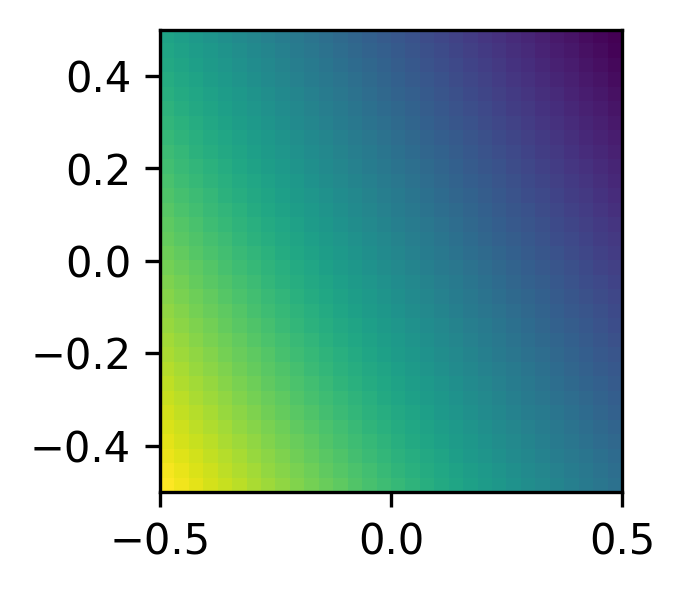

In [16]:
m = 32
single_range = np.linspace(-0.5, 0.5, m)
X, Y = np.meshgrid(single_range, single_range)

x = np.stack([X.flatten(), Y.flatten()], axis=1)

w1 = np.random.uniform(-1, 1, [2, 1])
b1 = np.random.uniform(-1, 1, [1])
y = forward_step(x, w1, b1)

plt.figure(figsize=(2,2))
plt.imshow(y.reshape(m,m), extent=(-0.5, 0.5, -0.5, 0.5))

What represent each dimension and component of this output vector.

We want to visualize this output as an image. However, we have a flattened array. Go back from a flattened array to a 2D array: $(M\times 1) \rightarrow (m\times m)$ using the `np.reshape()` function.

Plot the resulting matrix with [`plt.imshow()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html) and properly set the axis labels to cover the range $[-0.5, 0.5]$. Also, add a color bar to check the output range. 

What represents this image? What represent the axis of that image and what represent the colors.

Which kind of image is this? Does it have any specific orientation? Recall the weights and the sigmoid function.

Could you relate this image with the weights values?

### 1.4 Activation functions

Activation functions are a key point on neural networks, since they introduce nonlinearity on the computations. There are many types of activation functions, where some work very well for some problems and others for other.

Some info about activation functions:

[https://en.wikipedia.org/wiki/Activation_function](https://en.wikipedia.org/wiki/Activation_function)

[https://www.analyticsvidhya.com/blog/2021/04/activation-functions-and-their-derivatives-a-quick-complete-guide](https://www.analyticsvidhya.com/blog/2021/04/activation-functions-and-their-derivatives-a-quick-complete-guide)

Make a new function to implement a neural network layer, like before, but using another activation function and check its behavior
.

In [ ]:
def forward_step(x, weights, biases, act='sig'):  # change the name and the arguments of this function
    
    z = np.dot(x, weights) + biases

    if act=='sig':
        y = 1 / (1 + np.exp(-z))
    else if act=="relu":
        # your code here
    else:
        y = z
    
    return y

Check the differences between this resulting image and the one before. Orientation? Output range?

## 2. Network with hidden layers

### 2.1 One hidden layer

Let's increase the complexity of the neural network by adding a hidden layer with some inner neurons.

The idea here is to have multiple weight matrices to connect one layer with the next (i.e. one weight matrix is for each pair of subsequent layers).

The function that "applies a layer" (i.e. goes from one layer to the next) is exactly the same as the function evaluating the simple network made before.

Let's work with a three layers network, thus with one hidden layer in addition to the input and the output layers. Since we want to visualize the resulting application in an image like before, we will still dealing with 2 input and 1 output neurons. However, let's set **30 hidden neurons** in the inner layer.

Generate the weights matrices and the biases vectors with random numbers, like before. Which size (shape) should they have?

To easily visualize the behavior of the hidden layer, make the range of the first weights matrix larger than the rest of the numbers. Let's say $[-10, 10]$ for the weights connections from input to hidden layer, whereas leaving $[-1, 1]$ for the rest.

Ok, now, to apply the whole neural network, we have to apply every layer, step by step.

Thus, create a function to return the $y$ final result for given arguments: $x$ input vector, $[w]$ list of weights matrices and $[b]$ list of biases vector.

Notice that it is more convenient to group the weights matrices within a list or a tuple in a single argument because you may not know how many layers has the network (in other words, this function will work for any number of hidden layers). Same for the biases vectors. Then, a for loop to cover all layers can be used, where the function made in the previous exercises can be call. For instance, let's use the sigmoid function as activation.

Check the function you have just done above by applying the input vector $x=(0.3, -0.2)$, and print the result

Now, let's check the behavior of this network for many combinations of $x_1$ and $x_2$ inputs.

Thus, generate an image showing the result of the network when applied to pairs of inputs from -0.5 to 0.5, using 300 samples in each direction, like before.

Show the generated image.

What differences are between this image and those produced by the no-hidden-layer network? Could you identify any orientation on it?

### 2.2 A network with MANY hidden layers

We can create a $[\omega]$ list of weights containing many weight matrices between many layers.
Also, we can do the same for the $[b]$ biases.

Thus, create a big neural network having, let's say, 20 hidden layers, with some number of neurons each in the range $[20, 40]$. You can randomly set the specific number of neurons for each layer.

Set the weights matrices randomly in the range $[-5, 5]$ and the biases vectors in $[-1, 1]$.

Let's set the input layer with 2 neurons and 1 single output neuron, to be able to visualize the result.

Run this big neural network to the flatten and stacked input done before to cover $x=(x_1, x_2)$ input pairs in the range $[-0.5, 0.5]$, and `imshow` the result. Again, check the time consumed to apply this big network. 

Comment the image obtained.

## 3. Fancy visualization of Neural Networks with Pure Python

In this section you do not need to write code, just play with it to visualize different networks and activation functions to get familiar with the behavior of different hyper-parameters (number of layers, number of neurons, activation functions...) and to earn intuition.

### 3.1 Some internal routines for fancy plotting the network

This cell below contains code to show networks in tree plots where each branch color is proportional to its corresponding weight and the neuron color to its bias value. It is done in pure python/matplotlib.

In [5]:
BLUE_COLOR = [0, 0.4, 0.8]  # RGB color for the full-range negative value
ORANGE_COLOR = [1, 0.3, 0]  # RGB color for the full-range positive value

def plot_connection_line(ax, X, Y, W, vmax=10, linewidth=3):
    """ Draw a fancy line from (X[0], Y[0]) to (X[1], Y[1])
        according to the weight W into the frame ax.
    """
    t = np.linspace(0,1,20)  # free parameter to draw lines
    
    if W > 0:  # Color depending on the weight's sign
        col = ORANGE_COLOR
    else:
        col = BLUE_COLOR
    
    # fancy line from (X0, Y0) to (X1, Y1)
    xx = X[0] + t*(X[1] - X[0])  # Linear in horizontal
    yy = Y[0] + (3*t**2 - 2*t**3) * (Y[1] - Y[0])  # Round borders
    
    # plotting the line according to the weight
    ax.plot(xx, yy, alpha=min(1, abs(W)/vmax),
            color=col, linewidth=linewidth)

    
def plot_neuron_alpha(ax, X, Y, B, size=100.0, vmax=10):
    """ Draw a single neuron in position (X, Y) according to 
        the bias B, into the frame ax.
    """
    if B > 0:
        col = ORANGE_COLOR
    else:
        col = BLUE_COLOR
        
    ax.scatter([X], [Y], marker='o', color=col, alpha=min(1, abs(B)/vmax), 
               s=size, zorder=10)

    
def plot_neuron(ax, X, Y, B, size=100.0, vmax=10):
    """ Draw a single neuron in position (X, Y) independently to 
        the bias B, into the frame ax.
    """
    if B > 0:
        col = ORANGE_COLOR
    else:
        col = BLUE_COLOR
        
    ax.scatter([X], [Y], marker='o', color=col, s=size, zorder=10)
    
    
def visualize_network(weights, biases, activations, M=400,
                      x0range=[-3,3], x1range=[-3,3],
                      size=400.0, linewidth=5.0, maxv=1.):
    """
    Visualize a neural network with 2 input 
    neurons and 1 output neuron (plot output vs input in a 2D plot)
    
    weights is a list of the weight matrices for the
    layers, where weights[j] is the matrix for the connections
    from layer j to layer j+1 (where j==0 is the input)
    
    weights[j][m,k] is the weight for input neuron k going to output neuron m
    (note: internally, m and k are swapped, see the explanation of
    batch processing in lecture 2)
    
    biases[j] is the vector of bias values for obtaining the neurons 
    in layer j+1, biases[j][k] is the bias for neuron k in layer j+1
    
    activations is a list of the activation functions for
    the different layers: choose 'linear','sigmoid', 
    'jump' (i.e. step-function), and 'reLU'
    
    M is the resolution (MxM grid)
    
    x0range is the range of y0 neuron values (horizontal axis)
    x1range is the range of y1 neuron values (vertical axis)
    """
    
    if type(weights) == str:
        weights = eval(weights)
    if type(biases) == str:
        biases = eval(biases)

    # Let's transpose the weight to be able the batch processing
    swapped_weights = []
    for j in range(len(weights)):
        swapped_weights.append(np.transpose(weights[j]))
        
    # Let's create a set of input-pairs by means of a mesh grid
    x0, x1 = np.meshgrid(np.linspace(x0range[0], x0range[1], M),
                         np.linspace(x1range[0], x1range[1], M))
    x = np.zeros([M*M, 2])
    x[:, 0] = x0.flatten()
    x[:, 1] = x1.flatten()
    
    # Let's apply the NN
    y_out = apply_net(x, swapped_weights, biases, activations)

    # We will plot a diagram at left and the result at right
    fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(8,4))
    
    
    # For the diagram
    
    #  1: posX and posY are arrays containing the positions of neurons
    posX = [[0, 0]]  # same column for both (at left)    
    posY = [[-0.5, +0.5]]  # for 2 inputs, let's putted centered in high

    
    vmax = 0.0 # for finding the maximum weight
    vmaxB = 0.0 # for maximum bias
    for j in range(len(biases)):  # for every layer on the NN
        n_neurons = len(biases[j])  # neurons in the current layer
        
        posX.append(np.full(n_neurons, j+1))  # next column to the previous one
        posY.append(np.array(range(n_neurons)) - 0.5 * (n_neurons-1)) # spread
        
        vmax = maxv#np.maximum(vmax, np.max(np.abs(weights[j])))  # to get the maximum
        vmaxB = maxv#np.maximum(vmaxB, np.max(np.abs(biases[j])))

    #   2: plot connections
    for j in range(len(biases)):  # for each layer
        for k in range(len(posX[j])):  # for each neuron
            for m in range(len(posX[j+1])):  # for each following neuron
                plot_connection_line(ax[0],  # first column of the plot
                                     [posX[j][k], posX[j+1][m]], # [X0,X1]
                                     [posY[j][k], posY[j+1][m]], # [Y0,Y1]
                                     swapped_weights[j][k,m],    # its weight
                                     vmax=vmax,  # to get normalized plots
                                     linewidth=linewidth)
    
    #   3: plot neurons
    for k in range(len(posX[0])):  # input neurons (have no bias!)
        plot_neuron(ax[0], posX[0][k], posY[0][k],
                    vmaxB, vmax=vmaxB, size=size)
        
    for j in range(len(biases)): # all other neurons
        for k in range(len(posX[j+1])):
            plot_neuron_alpha(ax[0], posX[j+1][k], posY[j+1][k],
                              biases[j][k], vmax=vmaxB, size=size)
    
    ax[0].axis('off')
    
    # now: the output of the network
    img = ax[1].imshow(np.reshape(y_out, [M,M]),
                       origin='lower',
                       extent=[x0range[0],x0range[1],x1range[0],x1range[1]])
    ax[1].set_xlabel('$x_1$')
    ax[1].set_ylabel('$x_2$')
    
    axins1 = inset_axes(ax[1],
                        width="40%",  # width = 50% of parent_bbox width
                        height="5%",  # height : 5%
                        loc='upper right')

    imgmin = np.min(y_out)
    imgmax = np.max(y_out)
    color_bar = fig.colorbar(img, cax=axins1, orientation="horizontal",
                             ticks=np.linspace(imgmin,imgmax,3))
    cbxtick_obj = plt.getp(color_bar.ax.axes, 'xticklabels')
    plt.setp(cbxtick_obj, color="white")
    axins1.xaxis.set_ticks_position("bottom")

    ax[1].set_title(' , '.join(activations))
    
    plt.show()

In the cell below we implement and example of a general network able to use different activation functions in each layer. Check it, but it should be very similar to your functions done above.

In [6]:
def apply_layer(x, w, b, activation):
    """ Batch processing of a single layer:
           x: input values  -> shape: [batchsize, num_neurons_in]
           w:    weight matrix -> shape: [n_neurons_in, n_neurons_out]
           b:    bias vector   -> length: n_neurons_out
    
           activation is some string of the following ones:
             - sigmoid
             - jump
             - linear
             - reLU
    
           returns the values of the output neurons in the next layer 
              -> shape: [batchsize, n_neurons_out]
    """
    z = np.dot(x, w) + b
    if activation == 'sigmoid':
        return 1 / (1 + np.exp(-z))
    elif activation == 'jump':
        return np.array(z>0, dtype='float')
    elif activation == 'linear':
        return z
    elif activation == 'reLU':
        return (z > 0) * z

    
def apply_net(x, weights, biases, activations):
    """ Apply a whole network of multiple layers.
          y_in: input values  -> shape: [batchsize, num_neurons_in]
          weights, biases and activations must be any iterable 
          which length is the layers' number containing
              weight matrix  -> shape: [n_neurons_in, n_neurons_out]
              bias vector    -> length: n_neurons_out
              activation str -> sigmoid, jump linear or reLU
          Alternatively, they can be extended matrices
          where a simple slicing generates the proper weight, 
          bias and activation.
    """
    y = x.copy()
    for j in range(len(biases)):
        y = apply_layer(y, weights[j], biases[j], activations[j])
    return y

### 3.2 No hidden layer NN

Let's visualize a simple network (no hidden layer) with different activation functions.

Notice that no hidden layer means that weight, biases and activations are list of one single item.

Play with different weights combinations to see its behavior. Do the same with the bias and the activation function.

In [7]:
print("You should see here three sliders and a text box to select the weights, "
      "bias, and activation function.\nIf you do not see them, try to restart "
      "the Jupyter Notebook application.")

@interact(w1=(-10.,10.), w2=(-10.,10.), b=(-10.,10.), activation=["sigmoid","jump","linear","reLU"])
def draw(w1=-3.4, w2=4.6, b=2.8, activation='sigmoid'):
    weights=[ [      # a list of matrices (length 1 in this case)
        [w1, w2]  # from 2 input neurons to a single output neuron: 1x2
        ] ]

    biases=[   # a list of vectors (length 1 in this case)
        [b]  # bias for 1 single output neuron: 1 value
        ]
   
    visualize_network(weights, biases, [activation], maxv=10)

You should see here three sliders and a text box to select the weights, bias, and activation function.
If you do not see them, try to restart the Jupyter Notebook application.


interactive(children=(FloatSlider(value=-3.4, description='w1', max=10.0, min=-10.0), FloatSlider(value=4.6, d…

How are the weights and bias related with the resulting image? And the activation function? 

### 3.3 Deep dense NN

Let's visualize a Neural Network of 1 hidden layer of 3 neurons using different activation functions

In [8]:
@interact(activation_1=["sigmoid","jump","linear","reLU"],
          activation_2=["sigmoid","jump","linear","reLU"])
def draw(weights="[[[0.2, 0.9],[-0.5, 0.3],[0.8, -1]],[[-0.3,0.7,0.5]]]",
         biases="[[0.1, -0.5, -0.5],[-0.2]]",
         activation_1='jump', activation_2='sigmoid'):

    visualize_network(weights, biases, [activation_1, activation_2], maxv=1)


interactive(children=(Text(value='[[[0.2, 0.9],[-0.5, 0.3],[0.8, -1]],[[-0.3,0.7,0.5]]]', description='weights…

Check the inclination of the lines having one hidden layer. How many lines are there when using a jump-sigmoid combination? And if the combination is sigmoid-jump? What about jump-jump? And sigmoid-sigmoid? How many lines in that combinations and how that lines are?

What happens if we set the first activation function as linear?

### 3.4 More layers and some activation function combination

In [9]:
# now more complicated, just for fun
@interact(activation_1=["sigmoid","jump","linear","reLU"],
          activation_2=["sigmoid","jump","linear","reLU"],
          activation_3=["sigmoid","jump","linear","reLU"])
def draw(w='[ [ [0.2, 0.9], [-0.5, 0.3], [0.8, -1.3],[-0.3, -0.9], [-0.8, -1.2]],'
           '  [ [0.2, 0.8,-0.6, -0.9, 0.3], [0.5, 0.1, 0.3, -0.7,-0.9], [-0.3, 0.7, 0.5, -0.3, 0.4]],'
           '  [ [-0.3, 0.7, -0.3] ]  ]',
         b='[[0.1, -0.5, -0.5, 0.3, 0.2], [0.2,-0.5,0.3], [0.5]]',
         activation_1='jump', activation_2='sigmoid', activation_3='reLU'):
   
    visualize_network(w, b, activations=[activation_1, activation_2, activation_3], maxv=1)
    

interactive(children=(Text(value='[ [ [0.2, 0.9], [-0.5, 0.3], [0.8, -1.3],[-0.3, -0.9], [-0.8, -1.2]],  [ [0.…

Which is the behavior of the firsts weights-biases layer? And the lasts?

Let's apply a `factor` to scale all weights and biases!

In [ ]:
@interact(activation_1=["sigmoid","jump","linear","reLU"],
          activation_2=["sigmoid","jump","linear","reLU"],
          factor=(0., 60.))
def draw(weights="[[[0.2, 0.9],[-0.5, 0.3],[0.8, -1]],[[-0.3,0.7,0.5]]]",
         biases="[[0.1, -0.5, -0.5],[-0.2]]",
         activation_1='sigmoid', activation_2='linear',
         factor=10):
    
    weights = eval(weights)
    biases = eval(biases)

    # this needs np.array(), because you cannot do factor*<python-list>
    ws = [factor*np.array(matrix) for matrix in weights]
    bs = [factor*np.array(vector) for vector in biases]
    
    visualize_network(ws, bs, [activation_1, activation_2], maxv=60)


What happen when increasing the scale of weights and biases while using the sigmoid function?

### 4.5 Something not random

Many superimposed lines can be used to construct arbitrary shapes, with only a single hidden layer.

In [17]:
@interact(factor=(1, 100), n_lines=(1, 20))
def draw(factor=10, n_lines=3):
    phi = np.linspace(0, 2*np.pi, n_lines+1)  # Angular variable
    phi = phi[:-1]  # the last value is 2pi, which is equivalent to the 0

    weight_hidden = np.zeros([n_lines, 2])   # comment this shape
    weight_hidden[:,0] = factor*np.cos(phi)  # x=cos(phi)
    weight_hidden[:,1] = factor*np.sin(phi)  # y=sin(phi)

    bias_hidden = np.full(n_lines, factor*(+0.5))  # all neurons acts equally

    visualize_network(weights=[ 
                                weight_hidden,           # from input to hidden
                                np.full([1,n_lines],1.0) # from hidden to output
                              ],
                      biases=[ 
                                bias_hidden,
                                [0.0]
                             ],
                      activations=['sigmoid',  # activation for hidden
                                   'reLU'    # activation for output
                                  ],
                      size=30.0, maxv=60)

interactive(children=(IntSlider(value=10, description='factor', min=1), IntSlider(value=3, description='n_line…

Play with different `factor` above to see how sigmoid behavior changes.

`n_lines` sets the number of lines on the figure, but what does it represent in the NN? Play with different number of lines.

Why weights are made of sines and cosines?

What are biases here? Play with it.

Why the weights corresponding from hidden to output layer are full of ones?

Why the output's activation function is linear?

Draw a sharp and big six-pointed star using the code above.

Draw a blurred and small circle using the code above